# To determine goldstandard pairs
1. Which GO terms should be removed?
2. Which Reactome terms should be removed?

Approach please see [This paper](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0000988), Figure 1A, Figure 1B

1. Histogram of gene per term, link per term
2. How LLS change upon removing several largest terms.

In [1]:
import pandas as pd
gold_anno = pd.read_pickle('/home/hermuba/data0118/goldstandard/ec_rmplasmid_node_anno_df')

In [2]:
gold_anno.shape

(31621, 20)

In [3]:
gold_anno.count()

cog_ID             12667
cog_category       12667
cluster            31621
count              31621
core               31621
loose_best_ARO       941
loose_ARO            941
strict_best_ARO      101
strict_ARO           101
is_card            31621
resfam              1159
aclame_title       15680
is_aclame          31621
nr                 30923
hypo_nr            15626
drug_target           78
is_drug_target     31621
GO                 10044
pathway             3003
domain             18601
dtype: int64

# Gene per term, Link per term

In [4]:
from collections import Counter
def count_gene_per_term(df, annotation):
    '''
    Count gene per term
    df: gold_anno
    annotaiton: 'GO' or 'Pathway'
    '''
    total_list = []
    for i in df[annotation]:
        if type(i) != float: # do not count nan
            total_list += list(i)
    #return(total_list)
    counting = pd.DataFrame.from_dict(dict(Counter(total_list)), orient = 'index', columns = ['gene_per_term'])
    return(counting)
def count_link_per_term(counting):
    '''
    count how many positive links will be generated from a single term. Combination(n, 2) = (n)(n-1)/2
    '''
    counting['link_per_term'] = counting['gene_per_term'].map(lambda x: x*(x-1)/2)


In [5]:
GO_count = count_gene_per_term(gold_anno, 'GO')
count_link_per_term(GO_count)
GO_count.sort_values(by = 'gene_per_term', ascending = False, inplace = True)

In [6]:
GO_count.head()

,gene_per_term,link_per_term
GO:0003677,2141,2290870.0
GO:0016020,1016,515620.0
GO:0006355,973,472878.0
GO:0016021,832,345696.0
GO:0005524,794,314821.0


In [7]:
largest_go = GO_count.iloc[:3].index

In [8]:
pathway_count = count_gene_per_term(gold_anno, 'pathway')
count_link_per_term(pathway_count)
pathway_count.sort_values(by = 'gene_per_term', ascending = False, inplace = True)

In [9]:
largest_pathway = pathway_count.iloc[:3].index

# Show how the distribution of LLS will change after we remove the 1st, 2nd and 3rd GO term.

Show no significant between 2 and 3.



In [112]:
# sample 100 genes that has all annotations and in string
net = '/home/hermuba/data0118/map_to_exist_net/string' #ID has problem
string = pd.read_csv(net)
all_string_genes = set(list(string['gene_one'])+ list(string['gene_two']))
sampled_gene = gold_anno[['GO', 'pathway']].dropna()
sampled_gene = sampled_gene.loc[sampled_gene.index.isin(all_string_genes)]

In [113]:
from Genome.goldstandard_pair.make_gold_file import gold_standard
# generate goldstandard for everyone, remove 1,2,3 of largest pairs
large = {'GO': largest_go, 'pathway': largest_pathway}
for anno in ['GO', 'pathway']:
    for i in range(3):
        
        gold_standard(sampled_gene, anno, 'sample100_{}'.format(i), large_term_to_remove = large[anno][:i])

In [134]:
# now calculate LLS score for all goldstandards
from Genome.goldstandard_pair.lls import *

dist = []
lls_score_all = []

for anno in ['GO', 'pathway']:
    for i in range(3):
        all_chunks = read_net_by_chunk(net)

        gd = 'sample100_{}{}'.format(i, anno)

        gold = read_gold(gd)
        print(gold['goldstandard'].sum())
        all_chunk = merge_net_with_all_chunks(gold,all_chunks)
        lls_score = lls_for_other(all_chunk, 'combined_score')
        lls_score_all.append(lls_score)
        lls_distribution = all_chunk['cut_mutual'].map(lls_score)
        
        second_largest = lls_distribution.unique()
        second_largest.sort()
        
        lls_distribution.replace([np.inf], second_largest[-2], inplace = True)
        dist.append(lls_distribution)
        

32639


/home/hermuba/resistanceExp/Genome/goldstandard_pair/lls.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  total = pd.concat([d1, d2])


32509


/home/hermuba/resistanceExp/Genome/goldstandard_pair/lls.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  total = pd.concat([d1, d2])


31436


/home/hermuba/resistanceExp/Genome/goldstandard_pair/lls.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  total = pd.concat([d1, d2])


4057


/home/hermuba/resistanceExp/Genome/goldstandard_pair/lls.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  total = pd.concat([d1, d2])


4054


/home/hermuba/resistanceExp/Genome/goldstandard_pair/lls.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  total = pd.concat([d1, d2])


4054


/home/hermuba/resistanceExp/Genome/goldstandard_pair/lls.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  total = pd.concat([d1, d2])


Text(0.5, 1.0, 'GO term')

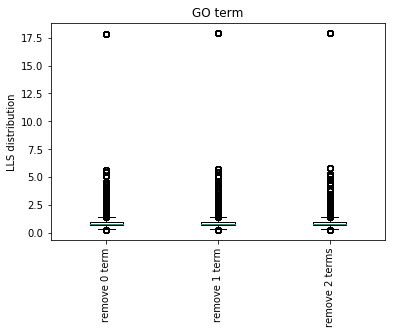

In [149]:
import seaborn as sns
plt.boxplot(dist[:3])
plt.xticks(np.arange(1,4),['remove 0 term', 'remove 1 term', 'remove 2 terms'], rotation = 90)
plt.ylabel('LLS distribution')
plt.title('GO term')

Text(0.5, 1.0, 'pathway')

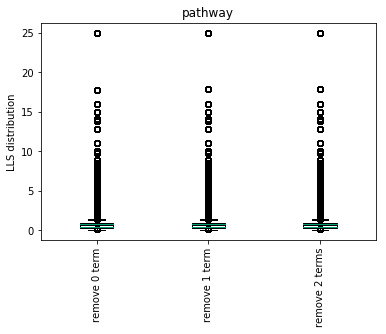

In [150]:
import seaborn as sns
plt.boxplot(dist[3:])
import seaborn as sns
plt.boxplot(dist[:3])
plt.xticks(np.arange(1,4),['remove 0 term', 'remove 1 term', 'remove 2 terms'], rotation = 90)
plt.ylabel('LLS distribution')
plt.title('pathway')

Text(0, 0.5, 'LLS')

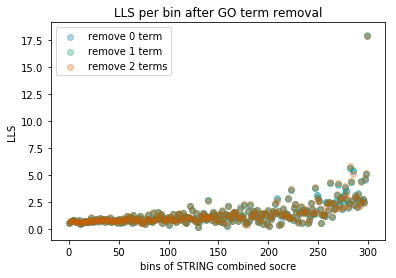

In [162]:
labels = ['remove 0 term', 'remove 1 term', 'remove 2 terms']
n  = 0
for i in lls_score_all[:3]:
    plt.scatter(np.arange(len(i)), i.values, alpha = 0.3, label = labels[n])
    n+=1
plt.title('LLS per bin after GO term removal')
plt.legend()
plt.xlabel('bins of STRING combined socre')
plt.ylabel('LLS')

Text(0, 0.5, 'LLS')

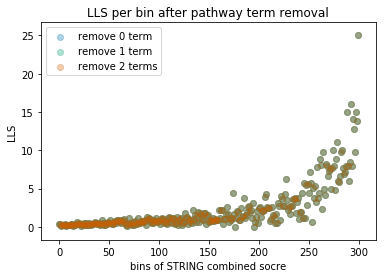

In [163]:
labels = ['remove 0 term', 'remove 1 term', 'remove 2 terms']
n  = 0
for i in lls_score_all[3:]:
    plt.scatter(np.arange(len(i)), i.values, alpha = 0.3, label = labels[n])
    n+=1
plt.title('LLS per bin after pathway term removal')
plt.legend()
plt.xlabel('bins of STRING combined socre')
plt.ylabel('LLS')

In [130]:
[i.mean() for i in dist]

[1.2656282290526228,
 1.2672043448498114,
 1.2644925006464116,
 1.3502339066143134,
 1.3502339066143134,
 1.3502339066143134]

## LLS don't change!

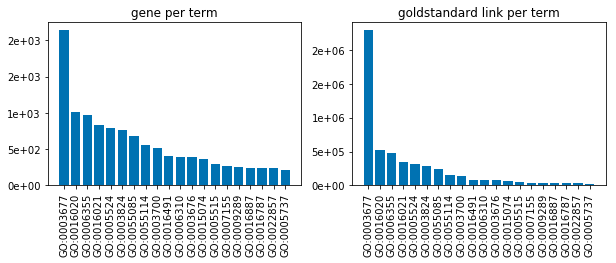

<Figure size 432x288 with 0 Axes>

In [142]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
mpl.style.use('seaborn-colorblind')
import matplotlib.ticker as mtick


f,ax = plt.subplots(1,2, figsize = (10,3))
ax[1].bar(np.arange(20), GO_count['link_per_term'].iloc[:20], label = 'Link per term')
ax[0].bar(np.arange(20), GO_count['gene_per_term'].iloc[:20], label = 'Gene per term')
for i in range(2):
    ax[i].set_xticks(np.arange(20))
    ax[i].set_xticklabels(GO_count['link_per_term'].iloc[:20].index, rotation = 90)
    ax[i].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

ax[1].set_title('goldstandard link per term')
ax[0].set_title('gene per term')

plt.show()
plt.tight_layout()
plt.savefig('/home/hermuba/figures/remove_large_GO.pdf', dpi = 300)

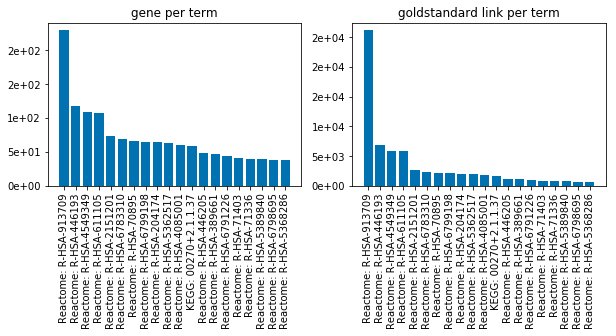

<Figure size 432x288 with 0 Axes>

In [151]:
f,ax = plt.subplots(1,2, figsize = (10,3))
ax[1].bar(np.arange(20), pathway_count['link_per_term'].iloc[:20], label = 'Link per term')
ax[0].bar(np.arange(20), pathway_count['gene_per_term'].iloc[:20], label = 'Gene per term')
for i in range(2):
    ax[i].set_xticks(np.arange(20))
    ax[i].set_xticklabels(pathway_count['link_per_term'].iloc[:20].index, rotation = 90)
    ax[i].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

ax[1].set_title('goldstandard link per term')
ax[0].set_title('gene per term')

plt.show()
plt.tight_layout()
plt.savefig('/home/hermuba/figures/remove_large_pathway.pdf', dpi = 300)

In [13]:
GO_count.value_counts()[:10]
# DNA binding
# membrane 
# regulation of transcription, DNA-templated
# integral component of membrane
# ATP binding
# catalytic activity
# transmembrane transport 
# oxidation-reduction process
# DNA-binding transcription factor activity 
# sequence-specific DNA binding 

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [ ]:
pa_count = count_term(gold_anno, 'pathway')

In [ ]:
pa_count.value_counts()[:100].plot(kind = 'bar', figsize = (20,2))

In [ ]:
pa_count.value_counts()[:5] 
# O-linked glycosylation of mucins R-HSA-913709
# Biosynthesis of the N-glycan precursor
# Respiratory electron transport
# Defective ALG2 causes ALG2-CDG (CDG-1i) 
# Transcriptional activation of mitochondrial biogenesis

In [ ]:
da_count = count_term(gold_anno, 'domain')

In [ ]:
da_count.value_counts()[:100].plot(kind = 'bar', figsize = (20,2))

In [ ]:
da_count.value_counts()[:5]
# P-loop containing nucleoside triphosphate hydrolase
# Winged helix-like DNA-binding domain superfamily 
# Winged helix DNA-binding domain superfamily 
# Lambda repressor-like, DNA-binding domain superfamily
# Homeobox-like domain superfamily 

In [ ]:
from Genome.goldstandard_pair.parse_interpro_out import *

In [ ]:
gold = gold_anno[['pathway', 'GO', 'nr', 'domain']].dropna()# sample from the ones with all the annotation
gold.to_pickle('/home/hermuba/data0118/bench_set/all_gold')
#gold = pd.read_pickle('/home/hermuba/data0118/bench_set/sampled_gold_200')

In [ ]:
n1, n2, g_gold = gold_standard(gold, 'GO', '/home/hermuba/data0118/bench_set/all_gold_go') # I removed the most popular GO term

In [ ]:
gold_itxn = pd.DataFrame(data = {'gene1':n1, 'gene2':n2, 'GO_inter':g_gold})

In [ ]:
gold_itxn['GO_inter'].sum() # 1760/19900 = true;

In [ ]:
n1, n2, p_gold = gold_standard(gold, 'pathway') # I removed the most popular GO term

In [ ]:
itxn = pd.DataFrame(data = {'gene1':n1, 'gene2':n2, 'path_inter':p_gold})

In [ ]:
gold_itxn = gold_itxn.merge(itxn, on = ['gene1', 'gene2'])

In [ ]:
n1, n2, d_gold = gold_standard(gold, 'domain')
itxn = pd.DataFrame(data = {'gene1':n1, 'gene2':n2, 'domain_inter':d_gold})
gold_itxn = gold_itxn.merge(itxn, on = ['gene1', 'gene2'])

In [ ]:
gold_itxn.sum()

In [ ]:
gold_itxn.to_pickle('/home/hermuba/data0118/bench_set/sampled_200_itxn')